In [1]:
import keras
import matplotlib.pyplot as plt
import seaborn as sn
import os 
import cv2
import numpy as np
import random
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Loading the dataset and getting info about it

In [49]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = "C:/ARUN M/Prodigy Infotech/Task4/leapGestRecog/leapGestRecog"
# data_path=data_path.replace("\\","/")

In [50]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [52]:
random.shuffle(image_data)

In [53]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[7, 7, 7, ..., 7, 8, 6],
        [5, 6, 6, ..., 7, 7, 7],
        [7, 8, 7, ..., 8, 8, 7],
        ...,
        [6, 6, 6, ..., 9, 8, 6],
        [5, 6, 6, ..., 8, 7, 6],
        [6, 7, 6, ..., 7, 7, 7]], dtype=uint8),
 array([[5, 5, 4, ..., 4, 4, 3],
        [5, 5, 5, ..., 4, 5, 3],
        [4, 5, 5, ..., 4, 4, 4],
        ...,
        [3, 4, 5, ..., 4, 4, 4],
        [4, 4, 4, ..., 3, 4, 4],
        [3, 4, 3, ..., 3, 4, 3]], dtype=uint8),
 array([[6, 6, 7, ..., 3, 4, 5],
        [5, 7, 7, ..., 4, 4, 5],
        [6, 7, 7, ..., 5, 5, 6],
        ...,
        [6, 6, 5, ..., 5, 5, 5],
        [7, 6, 7, ..., 6, 4, 4],
        [6, 5, 6, ..., 5, 6, 5]], dtype=uint8),
 array([[6, 6, 5, ..., 5, 6, 3],
        [6, 6, 5, ..., 7, 6, 4],
        [6, 6, 6, ..., 6, 6, 5],
        ...,
        [6, 6, 7, ..., 8, 8, 7],
        [4, 6, 5, ..., 7, 6, 6],
        [5, 6, 6, ..., 7, 7, 4]], dtype=uint8),
 array([[5, 5, 5, ..., 5, 5, 3],
        [4, 6, 5, ..., 4, 5, 4],
        [5, 6, 5, ..., 5, 5, 4

### Visualizing Data

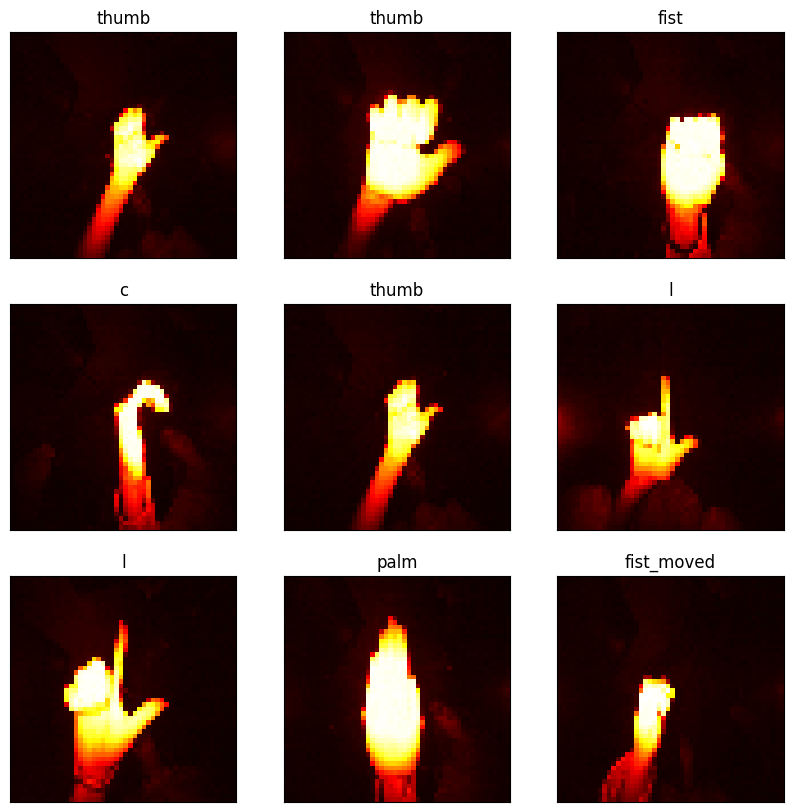

In [54]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

### Normalizing the data

In [55]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

### Making multilabel classifier

In [56]:
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)

In [57]:
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [58]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

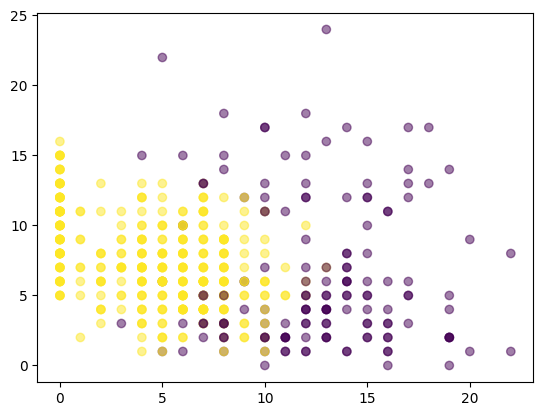

In [59]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [60]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

### One Hot Encoding

In [61]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

### Separating features and Spiting Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50), (18000, 10), (2000, 50, 50), (2000, 10))

### Model Traning and Prediction

In [63]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])

In [64]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7


563/563 [==============================] - 28s 47ms/step - loss: 0.2683 - accuracy: 0.9113 - val_loss: 0.0100 - val_accuracy: 0.9975
Epoch 2/7
563/563 [==============================] - 27s 48ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0099 - val_accuracy: 0.9970
Epoch 3/7
563/563 [==============================] - 26s 46ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 4/7
563/563 [==============================] - 26s 46ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 2.9442e-05 - val_accuracy: 1.0000
Epoch 5/7
563/563 [==============================] - 26s 46ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 1.1296e-05 - val_accuracy: 1.0000
Epoch 6/7
563/563 [==============================] - 26s 46ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 4.0520e-04 - val_accuracy: 0.9995
Epoch 7/7
563/563 [==============================] - 26s 47ms/step - loss: 7.4880e-04 - accuracy: 0.9998 - val_loss: 0.0046 - va

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

### Model Loss

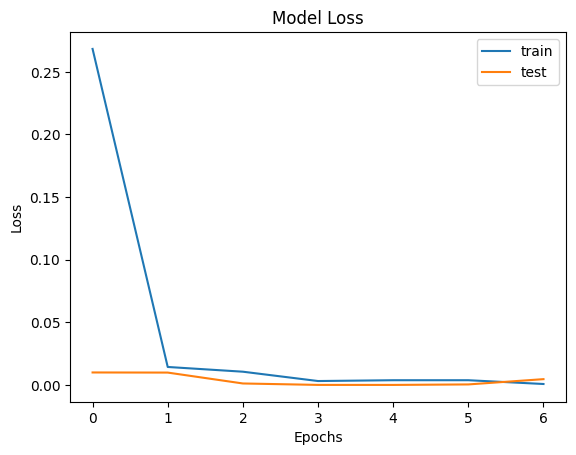

In [66]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Model Accuracy

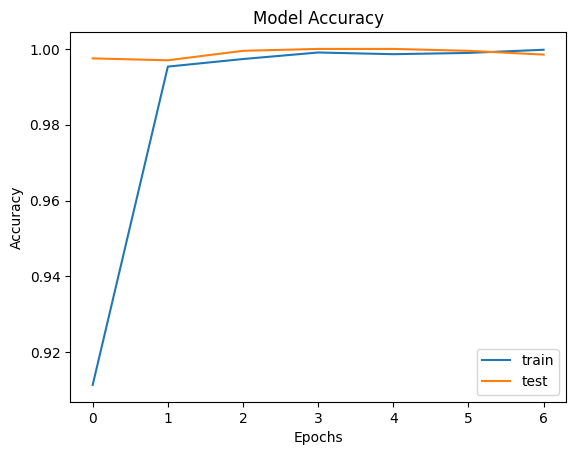

In [67]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [68]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 [==============================] - 1s 13ms/step - loss: 0.0046 - accuracy: 0.9985
Test accuracy: 99.85%


In [69]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print('Train accuracy: {:2.2f}%'.format(train_accuracy*100))

563/563 [==============================] - 7s 12ms/step - loss: 0.0044 - accuracy: 0.9987
Train accuracy: 99.87%


### Confusion Matrix

63/63 [==============================] - 1s 12ms/step


[]

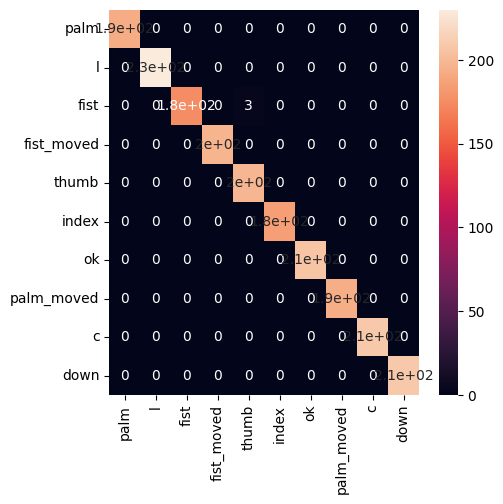

In [70]:
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

563/563 [==============================] - 6s 11ms/step


[]

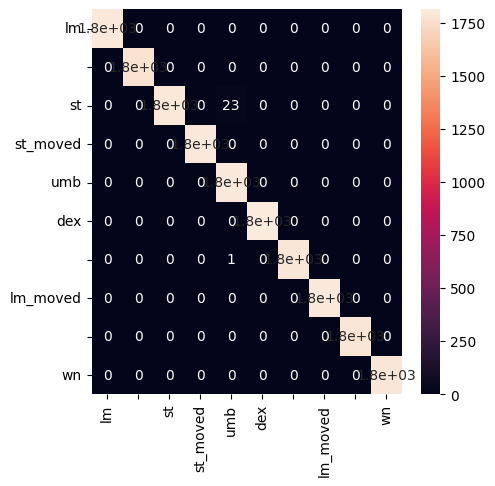

In [71]:
cat = [c[5:] for c in CATEGORIES]
plt.figure(figsize=(5,5))

cm = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()